## Econometrics I - Multiple Linear Regression with Python 

### Importing libraries for the project

In [1]:
import os
import pyreadr as pyr
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import squarify as sq
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence as influence

### Increasing graphics size

In [2]:
plt.rcParams["figure.figsize"] = [16, 8]

### Setting the path to load the data-frame (df)

In [3]:
os.chdir('/home/fabian/Documentos/')

### Functional form for the multiple lineal regression model

$$

Y_{i} = \beta_{0}+\beta_{1}X_{i1}+\beta_{2}X_{i2}+\beta_{3}X_{i3}+\beta_{4}X_{i4}+\beta_{5}X_{i5}+\beta_{6}X_{i6}+\beta_{7}X_{i7}+\beta_{8}X_{i8}+\beta_{9}X_{i9}+\hat{U_{i}}

$$

### Library Pyreadr for import a RData file  

In [4]:
## Load the RData file
base = pyr.read_r('base_guia.RData')
## Printing keys from the dictionary (base)
print(base.keys())

odict_keys(['base_1'])


### Extracting the df with Pandas

In [5]:
df = base['base_1']
pd.concat([df.head(5), df.tail(5)])

,ola,zona,region,estrato,n_internet,n_computadores,edad,sexo,afiliacion,regimen,ahorra,vive_conyuge,gasto_pc,fhog
rownames,,,,,,,,,,,,,,
111001-3,3,Urbano,Bogotá,3,Sí,1,60.0,Mujer,Sí,Contributivo,No,No,400000.000000,1974.060059
111003-3,3,Urbano,Bogotá,2,Sí,1,53.0,Mujer,Sí,Contributivo,No,No,165714.285714,2666.669922
111009-3,3,Urbano,Bogotá,2,No,0,37.0,Hombre,Sí,Contributivo,Sí,Sí,375000.000000,888.890015
111010-3,3,Urbano,Bogotá,2,Sí,1,51.0,Hombre,Sí,Subsidiado,No,Sí,600000.000000,888.890015
111011-3,3,Urbano,Bogotá,3,Sí,2,59.0,Hombre,Sí,Contributivo,No,Sí,490000.000000,891.390015
226620-3,3,Urbano,Oriental,2,Sí,2,49.0,Hombre,Sí,Contributivo,No,Sí,275000.000000,237.250000
226622-3,3,Urbano,Oriental,3,No,0,27.0,Mujer,Sí,Especial,Sí,No,232500.000000,119.660004
226623-3,3,Urbano,Oriental,2,No,0,50.0,Hombre,Sí,Contributivo,No,Sí,300000.000000,186.229996
226624-3,3,Urbano,Oriental,2,Sí,1,55.0,Hombre,Sí,Subsidiado,No,Sí,1000000.000000,1180.510010


### Number of rows and columns

In [6]:
df.shape

(3057, 14)

### Type of each column 

In [7]:
df.dtypes

ola               category
zona                object
region            category
estrato              int32
n_internet        category
n_computadores       int32
edad               float64
sexo              category
afiliacion          object
regimen           category
ahorra              object
vive_conyuge        object
gasto_pc           float64
fhog               float64
dtype: object

### Remove data frame index 

In [8]:
df = df.reset_index(drop=True)
df

,ola,zona,region,estrato,n_internet,n_computadores,edad,sexo,afiliacion,regimen,ahorra,vive_conyuge,gasto_pc,fhog
0,3,Urbano,Bogotá,3,Sí,1,60.0,Mujer,Sí,Contributivo,No,No,400000.000000,1974.060059
1,3,Urbano,Bogotá,2,Sí,1,53.0,Mujer,Sí,Contributivo,No,No,165714.285714,2666.669922
2,3,Urbano,Bogotá,2,No,0,37.0,Hombre,Sí,Contributivo,Sí,Sí,375000.000000,888.890015
3,3,Urbano,Bogotá,2,Sí,1,51.0,Hombre,Sí,Subsidiado,No,Sí,600000.000000,888.890015
4,3,Urbano,Bogotá,3,Sí,2,59.0,Hombre,Sí,Contributivo,No,Sí,490000.000000,891.390015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,3,Urbano,Oriental,2,Sí,2,49.0,Hombre,Sí,Contributivo,No,Sí,275000.000000,237.250000
3053,3,Urbano,Oriental,3,No,0,27.0,Mujer,Sí,Especial,Sí,No,232500.000000,119.660004
3054,3,Urbano,Oriental,2,No,0,50.0,Hombre,Sí,Contributivo,No,Sí,300000.000000,186.229996
3055,3,Urbano,Oriental,2,Sí,1,55.0,Hombre,Sí,Subsidiado,No,Sí,1000000.000000,1180.510010


### Loop to obtain frequency tables from some categorical variables

In [9]:
for i in df.loc[:, ['region', 'sexo', 'estrato']]:
    #print ("---- %s ---" % i)    
    display(df[i].value_counts().to_frame())

,region
Atlántica,739
Oriental,645
Pacífica,611
Central,606
Bogotá,456


,sexo
Hombre,1997
Mujer,1060


,estrato
2,1226
1,927
3,764
4,140


### Some graphs for categorical variables with either Plotly or Matplotlib

In [10]:
df_regimen = df.groupby('regimen')['fhog'].sum().rename_axis('Régimen').to_frame('Conteo').reset_index()
df_regimen['porcentaje'] = (df_regimen['Conteo']/df_regimen['Conteo'].sum())*100

df_regimen

,Régimen,Conteo,porcentaje
0,Contributivo,4.144006e+06,64.219794
1,Especial,2.956624e+05,4.581890
2,Ninguno,2.020049e+05,3.130477
3,Subsidiado,1.811175e+06,28.067839


In [11]:
fig_1 = px.bar(df_regimen, x='Régimen', y='porcentaje', color='Régimen', 
               width=1200, height=600, title='Barplot of Régimen',
               text = df_regimen['porcentaje'].apply(lambda x: '{0:1.1f}%'.format(x))).update_layout(title={'x':0.5}, 
                                         font=dict(size=25))
fig_1.show()

In [12]:
fig_2 = px.pie(df_regimen, values='porcentaje',names='Régimen', 
               title='Piechart régimen de salud', width=1000, 
               height=600).update_layout(title={'x':0.5}, 
                                         font=dict(size=22))
fig_2.show()

#### Barplot for Regions

In [13]:
df_region = df.groupby('region')['fhog'].sum().rename_axis('Región').to_frame('Conteo').reset_index()
df_region['Porcentaje'] = (df_region['Conteo']/df_region['Conteo'].sum())*100
df_region

,Región,Conteo,Porcentaje
0,Atlántica,1.186326e+06,18.384542
1,Bogotá,1.613400e+06,25.002912
2,Central,1.595809e+06,24.730302
3,Oriental,1.153168e+06,17.870678
4,Pacífica,9.041450e+05,14.011566


In [14]:
fig_3 = px.bar(df_region, x='Región', y='Porcentaje', color='Región', 
               width=1200, height=650, title= 'Barplot for Regions',
               text = df_region['Porcentaje'].apply(lambda x: '{0:1.1f}%'.format(x))).update_layout(title={'x':0.5}, 
                                         font=dict(size=25))
fig_3.show()

### Tree-map for Estratos

In [15]:
df_estrato = df.groupby('estrato')['fhog'].sum().rename_axis('Estrato').to_frame('Conteo').reset_index()
df_estrato['Porcentaje'] = (df_estrato['Conteo']/df_estrato['Conteo'].sum())*100

df_estrato

,Estrato,Conteo,Porcentaje
0,1,1.266749e+06,19.630849
1,2,2.432061e+06,37.689731
2,3,2.044991e+06,31.691297
3,4,7.090468e+05,10.988122


(0.0, 100.0, 0.0, 100.0)

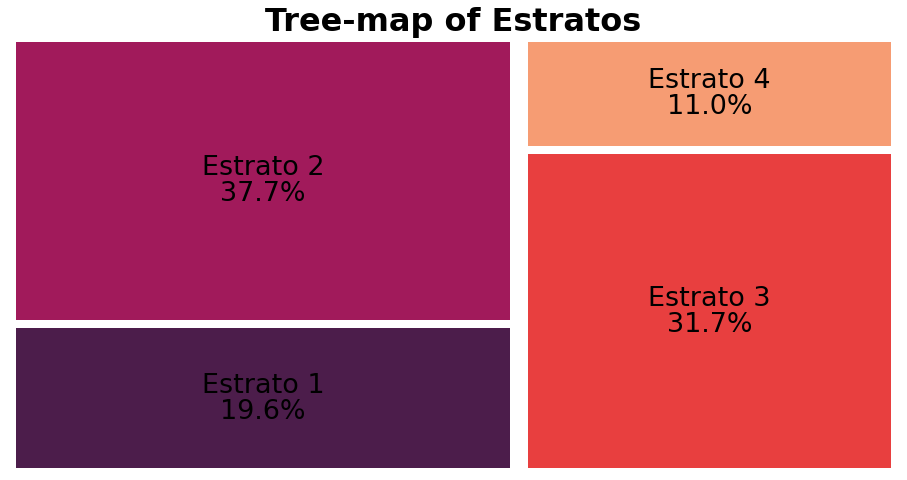

In [16]:
norms = sq.normalize_sizes(df_estrato['Porcentaje'].to_list(),  dx=3, dy=3)

sq.plot(sizes=norms, label=[f'Estrato {x:1.0f}' for x in df_estrato['Estrato'].to_list()], 
value=[f'{x:.1f}%' for x in df_estrato['Porcentaje']], 
alpha=1, pad=True,text_kwargs={'fontsize': 27}, 
color=sns.color_palette('rocket', len(norms)))

plt.title("Tree-map of Estratos", fontsize=32, fontweight="bold")
plt.axis("off")

### Histogram of edades

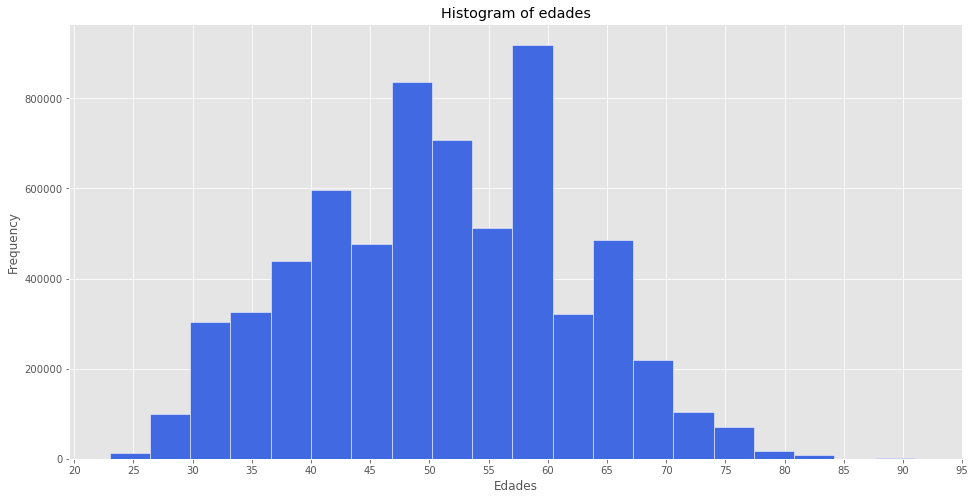

In [17]:
df["edad"].plot(kind="hist", weights = df["fhog"], bins = 20, 
                stacked=True, edgecolor = "white", color = "royalblue", 
               title = "Histogram of edades", xticks = np.arange(20, 100, 5), 
               ylabel = "Frequency").set(xlabel = 'Edades', ylabel = 'Frequency');

### Logarithmic transformation for household per-capita expenditures

In [18]:
df["ln_gasto_pc"] = np.log(df["gasto_pc"])

### Histogram of household per-capita expenditures

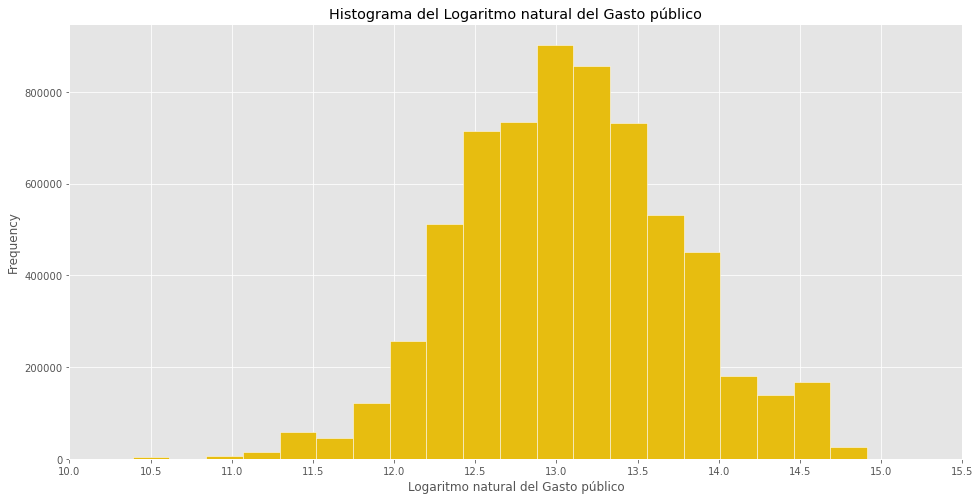

In [19]:
df["ln_gasto_pc"].plot(kind="hist", weights = df["fhog"], bins = 20, 
                stacked = True, edgecolor = "white", color = '#E7BD10', 
                xlabel = "Frequency", xticks = np.arange(10, 16, 0.5), 
                       title = "Histograma del Logaritmo natural del Gasto público").set(xlabel = 'Logaritmo natural del Gasto público', 
                                           ylabel = 'Frequency');

### Final functional form for this exercise 

$$
\begin{equation}
\begin{aligned}
	\hat{ln(gasto\_pc)_{i}} = \beta_{0}
	&+ \beta_{1} \mathrm{edad}_{i} + \beta_{2} (\mathrm{edad}_{i})^2  \\
	&+ \beta_{3} \mathrm{estrato}_{i} +   \beta_{4}  \mathrm{sexo}_{i} \\
	&+ \beta_{5}  \mathrm{regimen}_{i} + \beta_{6} \mathrm{n\_computadores}_{i}  \\
	&+ \beta_{7}  \mathrm{n\_internet}_{i} +  \beta_{8}  \mathrm{vive\_conyuge}_{i} \\
	&+ \beta_{9}  \mathrm{ahorra}_{i}      \\
	 	 
\end{aligned}
\end{equation}
$$

## Linear regression with "statsmodels" library

### Creating a new data-frame (Y) with the dependent variable

In [20]:
Y = df.loc[:, 'ln_gasto_pc'] 

### New variable: edad squared

In [21]:
df["edad_cuadrado"] = df["edad"]**2

### Creating a new data-frame (X) with independent variables

In [22]:
X = df[["edad", "edad_cuadrado", "estrato", "sexo", "regimen", "n_computadores", "n_internet", "vive_conyuge", "ahorra"]]
X.head()

,edad,edad_cuadrado,estrato,sexo,regimen,n_computadores,n_internet,vive_conyuge,ahorra
0,60.0,3600.0,3,Mujer,Contributivo,1,Sí,No,No
1,53.0,2809.0,2,Mujer,Contributivo,1,Sí,No,No
2,37.0,1369.0,2,Hombre,Contributivo,0,No,Sí,Sí
3,51.0,2601.0,2,Hombre,Subsidiado,1,Sí,Sí,No
4,59.0,3481.0,3,Hombre,Contributivo,2,Sí,Sí,No


### New name for the variable "fhog"

In [23]:
weights = df["fhog"]

### Adding a new column for the constant term

In [24]:
X_constant = sm.add_constant(X)
X_constant

,const,edad,edad_cuadrado,estrato,sexo,regimen,n_computadores,n_internet,vive_conyuge,ahorra
0,1.0,60.0,3600.0,3,Mujer,Contributivo,1,Sí,No,No
1,1.0,53.0,2809.0,2,Mujer,Contributivo,1,Sí,No,No
2,1.0,37.0,1369.0,2,Hombre,Contributivo,0,No,Sí,Sí
3,1.0,51.0,2601.0,2,Hombre,Subsidiado,1,Sí,Sí,No
4,1.0,59.0,3481.0,3,Hombre,Contributivo,2,Sí,Sí,No
...,...,...,...,...,...,...,...,...,...,...
3052,1.0,49.0,2401.0,2,Hombre,Contributivo,2,Sí,Sí,No
3053,1.0,27.0,729.0,3,Mujer,Especial,0,No,No,Sí
3054,1.0,50.0,2500.0,2,Hombre,Contributivo,0,No,Sí,No
3055,1.0,55.0,3025.0,2,Hombre,Subsidiado,1,Sí,Sí,No


### Transforming categorical variables to dummies

In [25]:
X_constant = pd.get_dummies(X_constant, columns=["sexo", "regimen", "estrato", "n_computadores", "n_internet", "vive_conyuge", "ahorra"], drop_first=True)
X_constant

,const,edad,edad_cuadrado,sexo_Mujer,regimen_Especial,regimen_Ninguno,regimen_Subsidiado,estrato_2,estrato_3,estrato_4,n_computadores_1,n_computadores_2,n_computadores_3,n_computadores_4,n_internet_Sí,vive_conyuge_Sí,ahorra_Sí
0,1.0,60.0,3600.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,1.0,53.0,2809.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1.0,37.0,1369.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,1.0,51.0,2601.0,0,0,0,1,1,0,0,1,0,0,0,1,1,0
4,1.0,59.0,3481.0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,1.0,49.0,2401.0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
3053,1.0,27.0,729.0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
3054,1.0,50.0,2500.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3055,1.0,55.0,3025.0,0,0,0,1,1,0,0,1,0,0,0,1,1,0


### Weighted Least Squares (WLS)

In [26]:
weighted_model = sm.WLS(Y,X_constant, weights = weights)
model = weighted_model.fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:            ln_gasto_pc   R-squared:                       0.387
Model:                            WLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     119.9
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          5.84e-308
Time:                        14:17:00   Log-Likelihood:                -3253.5
No. Observations:                3057   AIC:                             6541.
Df Residuals:                    3040   BIC:                             6643.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.6577      0

In [99]:
#print(f'Durbin-Watson test = {dw:.3f}. Criterium: Positive correlation.')

print(f'R squared = {model.rsquared:.2f}')
print(f'R squared adjusted = {model.rsquared_adj:.2f}')
print(f'Mean Squared Error = {model.mse_resid:.1f}')
print('Root mean squared Error =', round(np.sqrt(model.mse_resid), 2))
print('Mean of residuals =', round(np.mean(model.resid), 6))

R squared = 0.39
R squared adjusted = 0.38
Mean Squared Error = 582.1
Root mean squared Error = 24.13
Mean of residuals = -0.010034


## Multiple Linear Regression assumptions

### Graph of Predicted vs Observed

[Text(0.5, 1.0, 'Predicted vs Observed'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Observed')]

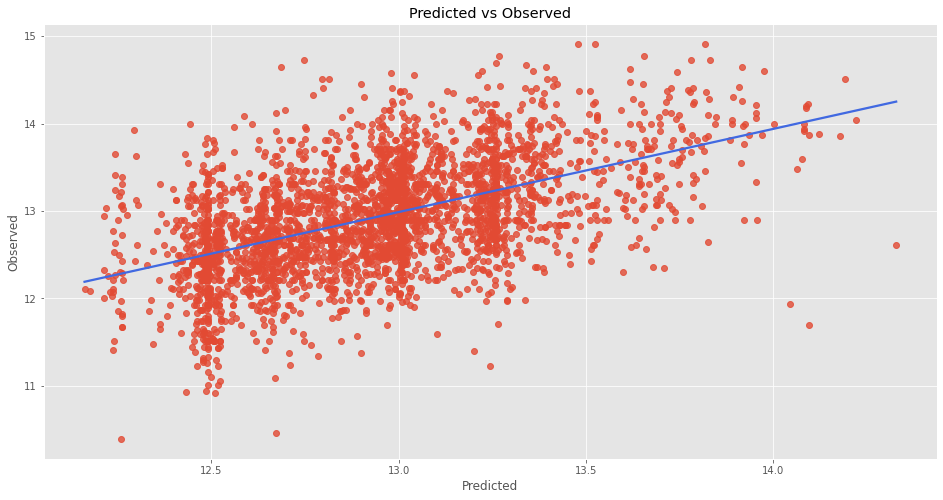

In [27]:
sns.regplot(x=model.predict(), y = Y, 
ci=None, line_kws={"color": "royalblue"}).set(title = "Predicted vs Observed",
xlabel = "Predicted", ylabel = "Observed") 

### New data-frame with both Predicted and Observed values

In [28]:
datos = {'Predicted': model.fittedvalues, 'Observed': Y}
df_model = pd.DataFrame(datos)

In [29]:
fig_4 = px.scatter(df_model, x="Predicted", y="Observed", 
trendline="ols", trendline_color_override="red", width=1350, 
height=700, 
title='Predicted vs Observed').update_layout(title={'x':0.5}, font=dict(size=17))                                         

fig_4.show()

### Multicollinearity

In [30]:
pd.DataFrame({'variables':X_constant.columns[1:], 'VIF':[variance_inflation_factor(X_constant.values, i+1) for i in range(len(X_constant.columns[1:]))]})                       


,variables,VIF
0,edad,58.212523
1,edad_cuadrado,58.188147
2,sexo_Mujer,2.043208
3,regimen_Especial,1.034624
4,regimen_Ninguno,1.042381
5,regimen_Subsidiado,1.364546
6,estrato_2,1.591815
7,estrato_3,1.759852
8,estrato_4,1.281021
9,n_computadores_1,1.760201


### Function for the Ramsey Reset Test (functional form)

In [31]:
def reset_test(x):
    import statsmodels.stats.outliers_influence as oi
    modelo = weighted_model.fit()
    rt = oi.reset_ramsey(modelo, degree = 3)
    p_value = rt.pvalue

    if p_value >= 0.05:
        print(f'Ramsey Reset Test p-value = {p_value:.3f}. We do not have enough evidence to reject the Null Hypothesis.')
    else:
        print(f'Ramsey Reset Test p-value = {p_value:.3f}. The Null Hypothesis has been rejected.')

In [32]:
reset_test(model)

Ramsey Reset Test p-value = 0.558. We do not have enough evidence to reject the Null Hypothesis.


### Dafa-frame of Residuals

In [33]:
df_resid = model.resid.rename_axis('Conteo').to_frame('Residuals').reset_index()
df_resid

,Conteo,Residuals
0,0,-0.388636
1,1,-1.028151
2,2,-0.200036
3,3,0.625588
4,4,-0.325255
...,...,...
3052,3052,-0.655685
3053,3053,-1.012408
3054,3054,-0.365158
3055,3055,1.134633


### No-Autocorrelation

#### Durbin-Watson test

In [34]:
def test_dw(x):
    from statsmodels.stats.stattools import durbin_watson
    dw = durbin_watson(x.resid)
        
    if dw > 2.5:
     print(f'Durbin-Watson test = {dw:.3f}. Criterium: Positive correlation.')
    elif 1.5 < dw < 2.5:
     print(f'Durbin-Watson test = {dw:.3f}. Criterium: No serial correlation.')
    else:
     print(f'Durbin-Watson test = {dw:.3f}. Criterium: Negative correlation.') 

In [35]:
test_dw(model)

Durbin-Watson test = 1.877. Criterium: No serial correlation.


### Heteroskedasticity

#### Scatter plot of Residuals vs Fitted

[Text(0.5, 1.0, 'Predicted vs Residuals'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Residuals')]

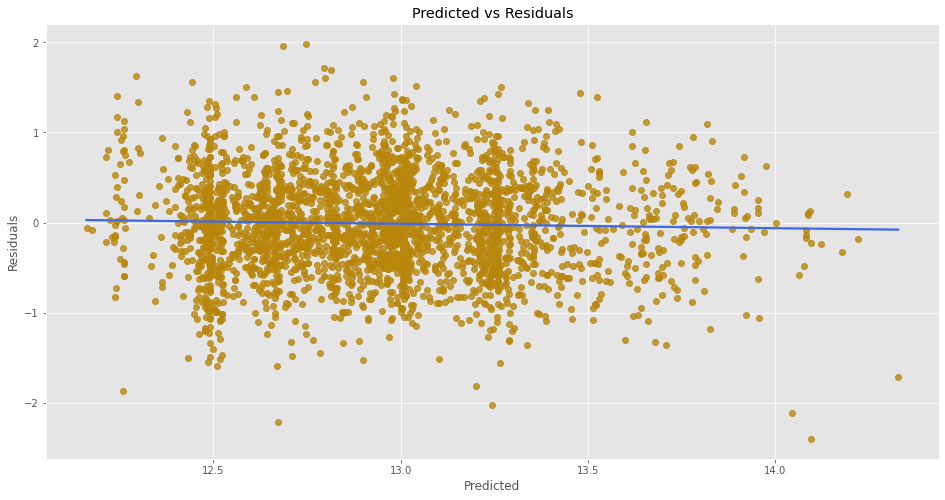

In [36]:
sns.regplot(x=model.fittedvalues, y = model.resid, 
                     ci=None, line_kws={"color": "royalblue"}, 
                scatter_kws={"color": "darkgoldenrod"}).set(title = "Predicted vs Residuals", 
                                                xlabel = "Predicted", 
                                                 ylabel = "Residuals")

#### Breush-Pagan and Goldfeld-Quandt test to detect heteroskedasticity

In [37]:
def heteros_tests(x):
    residuals = x.resid
    import statsmodels.stats.api as sms
    bp_test = pd.DataFrame(sms.het_breuschpagan(x.resid, x.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])
    gq_test = pd.DataFrame(sms.het_goldfeldquandt(x.resid, x.model.exog)[:-1],
                           columns=["Value"],
                           index=['F statistic', 'p-value'])
    
    print("\n Breusch-Pagan test")
    print(bp_test)
    print("\n Goldfeld-Quandt test")
    print(gq_test)

#### Applying function    
heteros_tests(model)  


 Breusch-Pagan test
                                   value
Lagrange multiplier statistic  57.035276
p-value                         0.000002
f-value                         3.612277
f p-value                       0.000001

 Goldfeld-Quandt test
                Value
F statistic  0.872290
p-value      0.996029


In [38]:
from statsmodels.stats.diagnostic import het_white
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 195.299660360894, 'Test Statistic p-value': 9.959618862939604e-06}


### Residuals of the WLS

#### Histogram with Seaborn (sns)

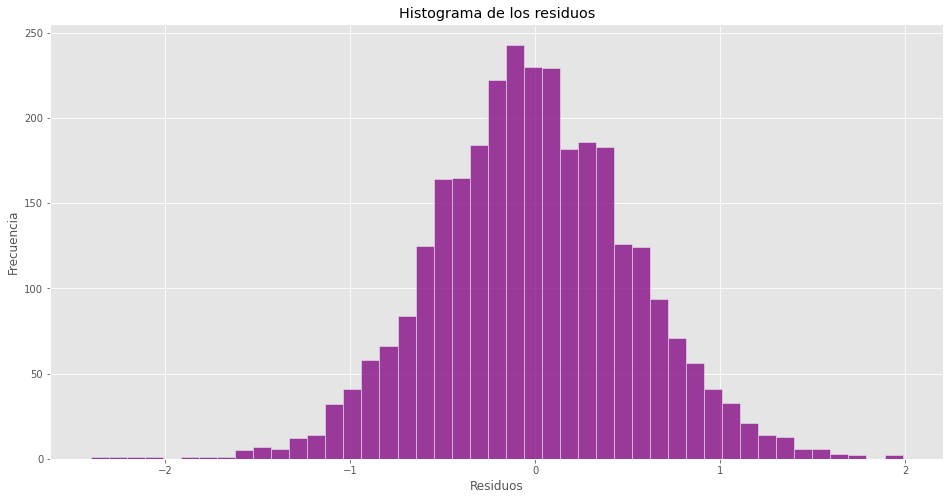

In [39]:
sns.histplot(model.resid, color="purple").set(title = "Histograma de los residuos", 
                                xlabel = "Residuos", ylabel = "Frecuencia");

#### Histogram with Plotly Express

In [40]:
fig_4 = px.histogram(model.resid.rename_axis('Conteo').to_frame('Residuals').reset_index(), 
x = 'Residuals', template='simple_white+presentation', height=700, width=1200, 
title='Histogram of residuals').update_layout(title={'x':0.5}, font=dict(size=17)) 

fig_4.show()

### Normality tests

In [41]:
def normal_test(x):
    
    ad = stats.anderson(x.resid, dist='norm')
    sw = stats.shapiro(x.resid)
    jb = stats.jarque_bera(x.resid)
    lill = sm.stats.diagnostic.lilliefors(x.resid)    
    
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.2f}, 5% critical value: {ad.critical_values[2]:.3f}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.2f}, p-value: {sw[1]:.3f}')
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.2f}, p-value: {jb[1]: .3f}')
    print(f'Lilliefors test ---- statistic: {lill[0]: .2f}, p-value: {lill[1]: .3f}')

In [42]:
normal_test(model)

Anderson-Darling test ---- statistic: 1.04, 5% critical value: 0.786
Shapiro-Wilk test ---- statistic: 1.00, p-value: 0.001
Jarque-Bera test ---- statistic: 20.78, p-value:  0.000
Lilliefors test ---- statistic:  0.02, p-value:  0.034


## Applying the distance of Cook

### Suppress the scientific notation with Numpy

In [43]:
np.set_printoptions(suppress=True)

### Obtaining influential data

In [44]:
inf = influence(model)

### Calculating Cook's distance

In [45]:
inf.cooks_distance

(0       8.348704e-10
 1       7.178807e-09
 2       2.139840e-10
 3       1.821624e-09
 4       9.438702e-10
             ...     
 3052    2.010684e-09
 3053    8.552347e-09
 3054    2.390495e-10
 3055    7.010999e-09
 3056    6.547982e-12
 Length: 3057, dtype: float64,
 array([1., 1., 1., ..., 1., 1., 1.]))

### Cook's distance for every column

In [46]:
sm_fr = inf.summary_frame(); sm_fr[:10]
sm_fr 

,dfb_const,dfb_edad,dfb_edad_cuadrado,dfb_sexo_Mujer,dfb_regimen_Especial,dfb_regimen_Ninguno,dfb_regimen_Subsidiado,dfb_estrato_2,dfb_estrato_3,dfb_estrato_4,...,dfb_n_computadores_4,dfb_n_internet_Sí,dfb_vive_conyuge_Sí,dfb_ahorra_Sí,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,11.924801,30.678562,-46.326674,-32.063809,-126.004969,-105.711849,-32.936110,-23.232150,66.435245,134.279227,...,-9.995321,-118.160239,-63.885163,-79.494350,8.348704e-10,-0.016108,0.000055,-0.000119,-0.724425,-0.005358
1,12.642689,29.809505,-45.459950,-32.650018,-125.739266,-105.268807,-31.925267,-24.045892,67.997682,135.026336,...,-10.102336,-118.801817,-63.156777,-78.779412,7.178807e-09,-0.042616,0.000067,-0.000349,-1.917563,-0.015719
2,11.655315,30.917280,-46.491174,-31.761988,-126.189300,-105.792032,-33.011771,-23.715437,66.752692,133.995912,...,-9.964742,-117.781006,-64.363947,-80.298853,2.139840e-10,-0.008291,0.000053,-0.000060,-0.372847,-0.002712
3,11.006511,31.451030,-47.049064,-32.215663,-126.263873,-105.858741,-31.759735,-22.575433,67.028212,134.236742,...,-9.983851,-117.338730,-64.033973,-80.241264,1.821624e-09,0.025930,0.000046,0.000176,1.166226,0.007915
4,11.950250,30.682711,-46.317181,-31.681850,-126.015094,-105.858054,-33.174299,-23.344197,66.467960,134.369831,...,-10.006936,-118.021256,-64.334142,-79.437290,9.438702e-10,-0.013482,0.000088,-0.000127,-0.606270,-0.005696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,12.287775,30.253389,-45.846625,-31.573688,-125.800938,-105.715405,-32.809273,-23.947273,67.327625,134.951100,...,-10.079783,-118.248523,-64.380303,-78.796022,2.010684e-09,-0.027177,0.000046,-0.000185,-1.222390,-0.008316
3053,6.815381,35.437614,-50.603524,-32.667960,-135.416314,-105.696257,-32.994526,-23.841160,64.342125,133.417731,...,-9.853176,-116.639148,-63.325232,-82.089909,8.552347e-09,-0.041964,0.000083,-0.000381,-1.888204,-0.017157
3054,12.137137,30.384126,-45.978123,-31.703753,-126.143922,-105.684402,-32.692602,-23.954946,66.700971,133.960759,...,-9.953161,-117.592325,-64.458834,-79.559314,2.390495e-10,-0.015135,0.000018,-0.000064,-0.680634,-0.002867
3055,10.323337,31.913096,-47.432649,-32.552504,-126.325668,-105.817720,-30.453569,-21.847295,67.140433,134.363535,...,-9.934822,-116.785363,-63.811971,-80.537519,7.010999e-09,0.047029,0.000054,0.000345,2.116190,0.015535


#### Extracting Cook's distance

In [47]:
cook_distance = sm_fr["cooks_d"]
cook_distance

0       8.348704e-10
1       7.178807e-09
2       2.139840e-10
3       1.821624e-09
4       9.438702e-10
            ...     
3052    2.010684e-09
3053    8.552347e-09
3054    2.390495e-10
3055    7.010999e-09
3056    6.547982e-12
Name: cooks_d, Length: 3057, dtype: float64

### Transform to a DataFrame

In [48]:
cook_distance = cook_distance.to_frame()
cook_distance

,cooks_d
0,8.348704e-10
1,7.178807e-09
2,2.139840e-10
3,1.821624e-09
4,9.438702e-10
...,...
3052,2.010684e-09
3053,8.552347e-09
3054,2.390495e-10
3055,7.010999e-09


### Filtering Data

In [49]:
cook_distance = cook_distance.loc[cook_distance["cooks_d"] > 6*cook_distance["cooks_d"].mean()]
cook_distance

,cooks_d
96,3.084092e-08
137,2.113369e-08
151,2.008592e-08
219,1.821082e-08
273,2.452349e-08
...,...
2977,4.269935e-08
3015,3.590418e-07
3016,1.541588e-07
3018,2.104096e-08


### Removing outliers and creating a new DataFrame (df_2)

In [50]:
df_2 = df.drop(cook_distance.index)
df_2

,ola,zona,region,estrato,n_internet,n_computadores,edad,sexo,afiliacion,regimen,ahorra,vive_conyuge,gasto_pc,fhog,ln_gasto_pc,edad_cuadrado
0,3,Urbano,Bogotá,3,Sí,1,60.0,Mujer,Sí,Contributivo,No,No,400000.000000,1974.060059,12.899220,3600.0
1,3,Urbano,Bogotá,2,Sí,1,53.0,Mujer,Sí,Contributivo,No,No,165714.285714,2666.669922,12.018020,2809.0
2,3,Urbano,Bogotá,2,No,0,37.0,Hombre,Sí,Contributivo,Sí,Sí,375000.000000,888.890015,12.834681,1369.0
3,3,Urbano,Bogotá,2,Sí,1,51.0,Hombre,Sí,Subsidiado,No,Sí,600000.000000,888.890015,13.304685,2601.0
4,3,Urbano,Bogotá,3,Sí,2,59.0,Hombre,Sí,Contributivo,No,Sí,490000.000000,891.390015,13.102161,3481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,3,Urbano,Oriental,2,Sí,2,49.0,Hombre,Sí,Contributivo,No,Sí,275000.000000,237.250000,12.524526,2401.0
3053,3,Urbano,Oriental,3,No,0,27.0,Mujer,Sí,Especial,Sí,No,232500.000000,119.660004,12.356646,729.0
3054,3,Urbano,Oriental,2,No,0,50.0,Hombre,Sí,Contributivo,No,Sí,300000.000000,186.229996,12.611538,2500.0
3055,3,Urbano,Oriental,2,Sí,1,55.0,Hombre,Sí,Subsidiado,No,Sí,1000000.000000,1180.510010,13.815511,3025.0


### Dependent variable

In [51]:
Y_2 = df_2.loc[:, 'ln_gasto_pc']
Y_2

0       12.899220
1       12.018020
2       12.834681
3       13.304685
4       13.102161
          ...    
3052    12.524526
3053    12.356646
3054    12.611538
3055    13.815511
3056    12.542545
Name: ln_gasto_pc, Length: 2981, dtype: float64

### Independent variables

In [52]:
X_2 = df_2[["edad", "edad_cuadrado", "estrato", "sexo", "regimen", "n_computadores", "n_internet", "vive_conyuge", "ahorra"]]
X_2

,edad,edad_cuadrado,estrato,sexo,regimen,n_computadores,n_internet,vive_conyuge,ahorra
0,60.0,3600.0,3,Mujer,Contributivo,1,Sí,No,No
1,53.0,2809.0,2,Mujer,Contributivo,1,Sí,No,No
2,37.0,1369.0,2,Hombre,Contributivo,0,No,Sí,Sí
3,51.0,2601.0,2,Hombre,Subsidiado,1,Sí,Sí,No
4,59.0,3481.0,3,Hombre,Contributivo,2,Sí,Sí,No
...,...,...,...,...,...,...,...,...,...
3052,49.0,2401.0,2,Hombre,Contributivo,2,Sí,Sí,No
3053,27.0,729.0,3,Mujer,Especial,0,No,No,Sí
3054,50.0,2500.0,2,Hombre,Contributivo,0,No,Sí,No
3055,55.0,3025.0,2,Hombre,Subsidiado,1,Sí,Sí,No


### New name for the column of weights

In [53]:
weights_2 = df_2["fhog"]

### Add a new column

In [54]:
X_2_constant = sm.add_constant(X_2)
X_2_constant

,const,edad,edad_cuadrado,estrato,sexo,regimen,n_computadores,n_internet,vive_conyuge,ahorra
0,1.0,60.0,3600.0,3,Mujer,Contributivo,1,Sí,No,No
1,1.0,53.0,2809.0,2,Mujer,Contributivo,1,Sí,No,No
2,1.0,37.0,1369.0,2,Hombre,Contributivo,0,No,Sí,Sí
3,1.0,51.0,2601.0,2,Hombre,Subsidiado,1,Sí,Sí,No
4,1.0,59.0,3481.0,3,Hombre,Contributivo,2,Sí,Sí,No
...,...,...,...,...,...,...,...,...,...,...
3052,1.0,49.0,2401.0,2,Hombre,Contributivo,2,Sí,Sí,No
3053,1.0,27.0,729.0,3,Mujer,Especial,0,No,No,Sí
3054,1.0,50.0,2500.0,2,Hombre,Contributivo,0,No,Sí,No
3055,1.0,55.0,3025.0,2,Hombre,Subsidiado,1,Sí,Sí,No


### New columns with dummy values

In [55]:
X_2_constant = pd.get_dummies(X_2_constant, columns=["sexo", "estrato", "regimen", "n_computadores", "n_internet", "vive_conyuge", "ahorra"], drop_first=True)
X_2_constant

,const,edad,edad_cuadrado,sexo_Mujer,estrato_2,estrato_3,estrato_4,regimen_Especial,regimen_Ninguno,regimen_Subsidiado,n_computadores_1,n_computadores_2,n_computadores_3,n_computadores_4,n_internet_Sí,vive_conyuge_Sí,ahorra_Sí
0,1.0,60.0,3600.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1.0,53.0,2809.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
2,1.0,37.0,1369.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,1.0,51.0,2601.0,0,1,0,0,0,0,1,1,0,0,0,1,1,0
4,1.0,59.0,3481.0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,1.0,49.0,2401.0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
3053,1.0,27.0,729.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
3054,1.0,50.0,2500.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3055,1.0,55.0,3025.0,0,1,0,0,0,0,1,1,0,0,0,1,1,0


### Second WLS model

In [56]:
weighted_model_2 = sm.WLS(Y_2,X_2_constant, weights = weights_2)
model_2 = weighted_model_2.fit()
print(model_2.summary())

                            WLS Regression Results                            
Dep. Variable:            ln_gasto_pc   R-squared:                       0.446
Model:                            WLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     149.4
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:17:28   Log-Likelihood:                -2752.0
No. Observations:                2981   AIC:                             5538.
Df Residuals:                    2964   BIC:                             5640.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.5356      0

In [100]:
print(f'R squared = {model_2.rsquared:.2f}')
print(f'R squared adjusted = {model_2.rsquared_adj:.2f}')
print(f'Mean Squared Error = {model_2.mse_resid:.1f}')
print('Root mean squared Error =', round(np.sqrt(model_2.mse_resid), 2))
print('Mean of residuals =', round(np.mean(model_2.resid), 6))

R squared = 0.45
R squared adjusted = 0.44
Mean Squared Error = 429.3
Root mean squared Error = 20.72
Mean of residuals = -0.012037


### 

[Text(0.5, 1.0, 'Predicted vs Observed'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Observed')]

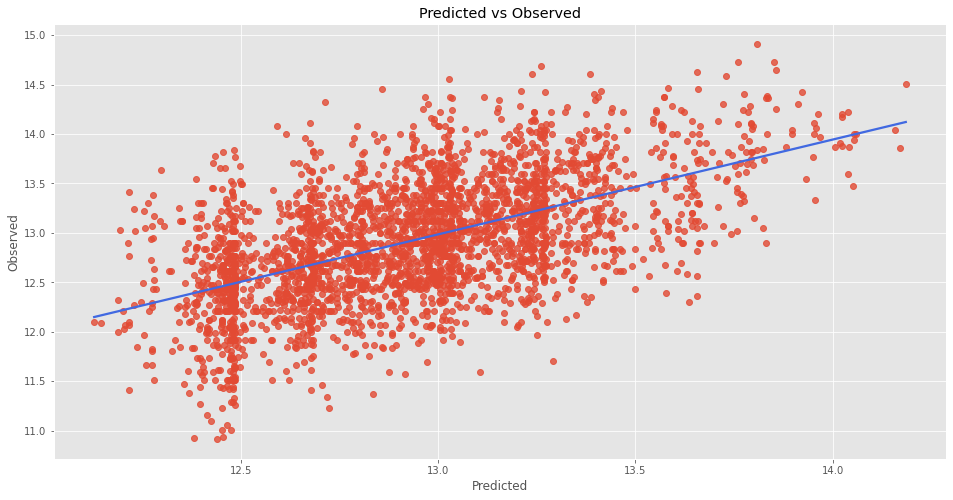

In [57]:
sns.regplot(x=model_2.predict(), y = Y_2, 
ci=None, line_kws={"color": "royalblue"}).set(title = "Predicted vs Observed",
xlabel = "Predicted", ylabel = "Observed") 

### Ramsey Reset Test

In [58]:
reset_test(model_2)

Ramsey Reset Test p-value = 0.558. We do not have enough evidence to reject the Null Hypothesis.


### Multicolinearity

In [59]:
pd.DataFrame({'variables':X_2_constant.columns[1:], 'VIF':[variance_inflation_factor(X_2_constant.values, i+1) for i in range(len(X_2_constant.columns[1:]))]})

,variables,VIF
0,edad,59.777375
1,edad_cuadrado,59.733715
2,sexo_Mujer,2.085519
3,estrato_2,1.583591
4,estrato_3,1.748010
5,estrato_4,1.263915
6,regimen_Especial,1.032063
7,regimen_Ninguno,1.037292
8,regimen_Subsidiado,1.356154
9,n_computadores_1,1.764052


### No-Autocorrelation

In [60]:
test_dw(model_2)

Durbin-Watson test = 1.882. Criterium: No serial correlation.


### Heteroskedasticity

[Text(0.5, 1.0, 'Predicted vs Residuals'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Residuals')]

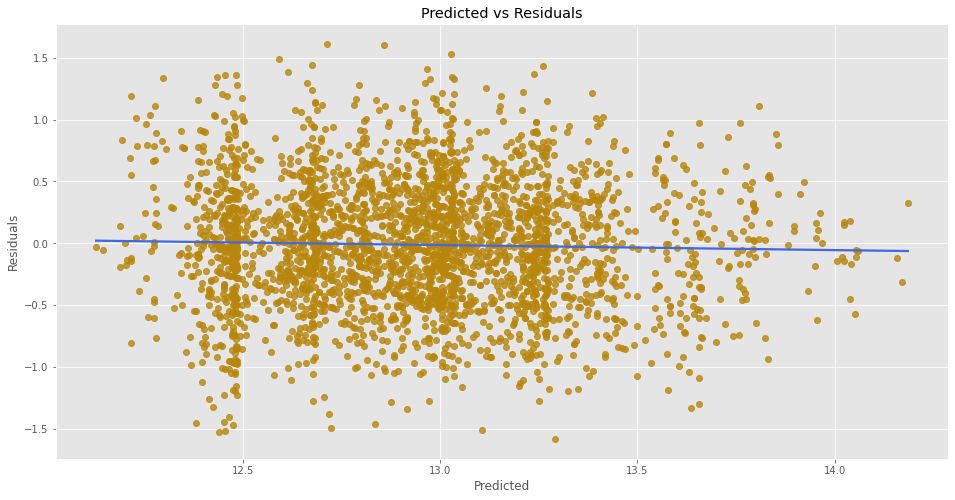

In [61]:
sns.regplot(x=model_2.fittedvalues, y = model_2.resid, 
                     ci=None, line_kws={"color": "royalblue"}, 
                scatter_kws={"color": "darkgoldenrod"}).set(title = "Predicted vs Residuals", 
                                                xlabel = "Predicted", 
                                                 ylabel = "Residuals")

In [62]:
heteros_tests(model_2)


 Breusch-Pagan test
                                   value
Lagrange multiplier statistic  44.591719
p-value                         0.000160
f-value                         2.813170
f p-value                       0.000150

 Goldfeld-Quandt test
                Value
F statistic  0.912192
p-value      0.961077


### White test

In [63]:
white_test = het_white(model_2.resid,  model_2.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 110.48343022581417, 'Test Statistic p-value': 0.5494260389459287}


[]

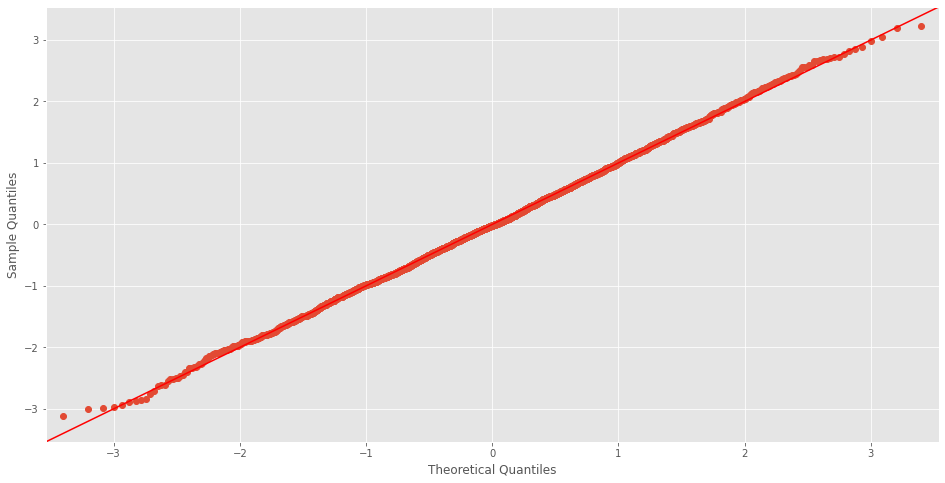

In [64]:
from statsmodels.graphics.gofplots import qqplot 
import pylab as py
qqplot(model_2.resid,fit=True,line="45") 
py.plot()

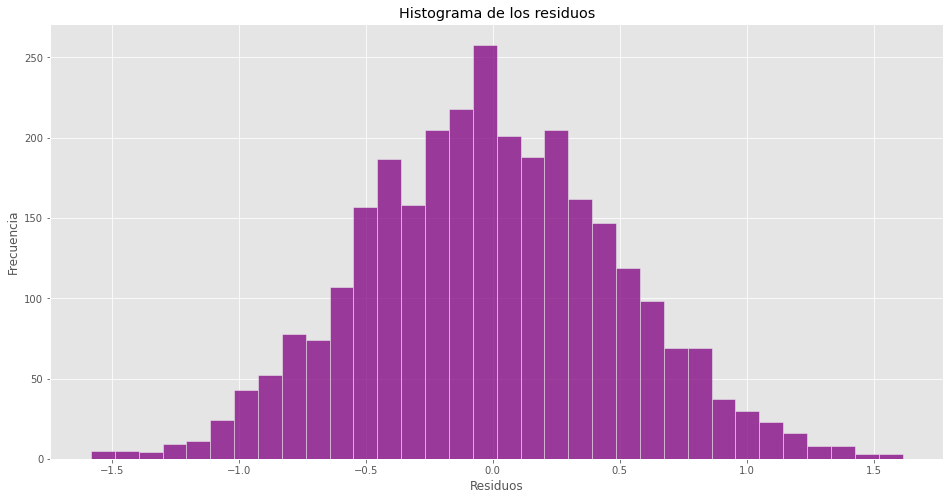

In [65]:
sns.histplot(model_2.resid, color="purple").set(title = "Histograma de los residuos", 
                                xlabel = "Residuos", ylabel = "Frecuencia");

### Normality tests

In [66]:
normal_test(model_2)

Anderson-Darling test ---- statistic: 0.44, 5% critical value: 0.786
Shapiro-Wilk test ---- statistic: 1.00, p-value: 0.279
Jarque-Bera test ---- statistic: 2.26, p-value:  0.322
Lilliefors test ---- statistic:  0.02, p-value:  0.087


### Printing parameters from the second Weighted Linear Regression

In [67]:
print(model_2.params)

const                 12.535612
edad                   0.014879
edad_cuadrado         -0.000116
sexo_Mujer            -0.205803
estrato_2              0.197290
estrato_3              0.435159
estrato_4              0.823634
regimen_Especial       0.173123
regimen_Ninguno       -0.122238
regimen_Subsidiado    -0.325899
n_computadores_1       0.045699
n_computadores_2       0.221501
n_computadores_3       0.439061
n_computadores_4      -0.006974
n_internet_Sí         -0.019929
vive_conyuge_Sí       -0.201211
ahorra_Sí              0.133204
dtype: float64
